In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Advertising.csv')
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [7]:
df.describe().round()

,TV,radio,newspaper,sales
count,200.0,200.0,200.0,200.0
mean,147.0,23.0,31.0,14.0
std,86.0,15.0,22.0,5.0
min,1.0,0.0,0.0,2.0
25%,74.0,10.0,13.0,10.0
50%,150.0,23.0,26.0,13.0
75%,219.0,37.0,45.0,17.0
max,296.0,50.0,114.0,27.0


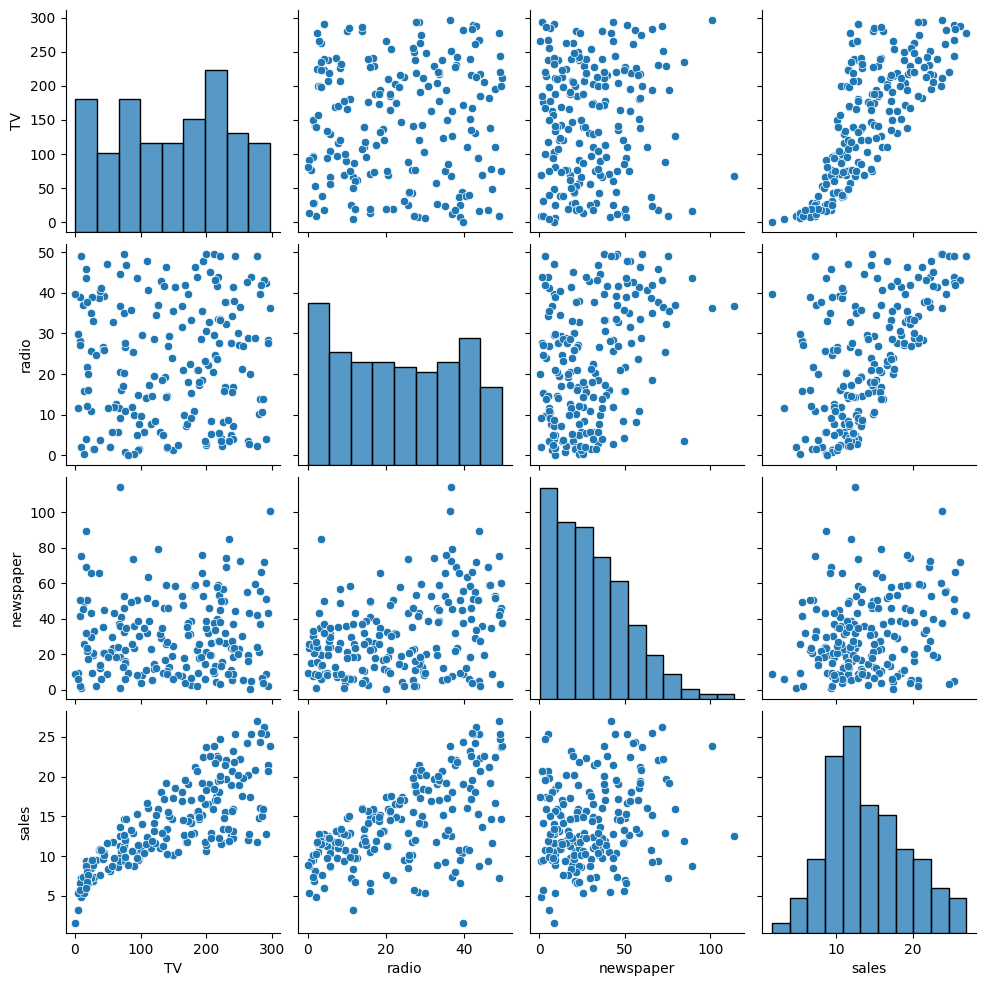

In [9]:
sns.pairplot(df)

Text(0.5, 1.0, 'Newspaper Spend')

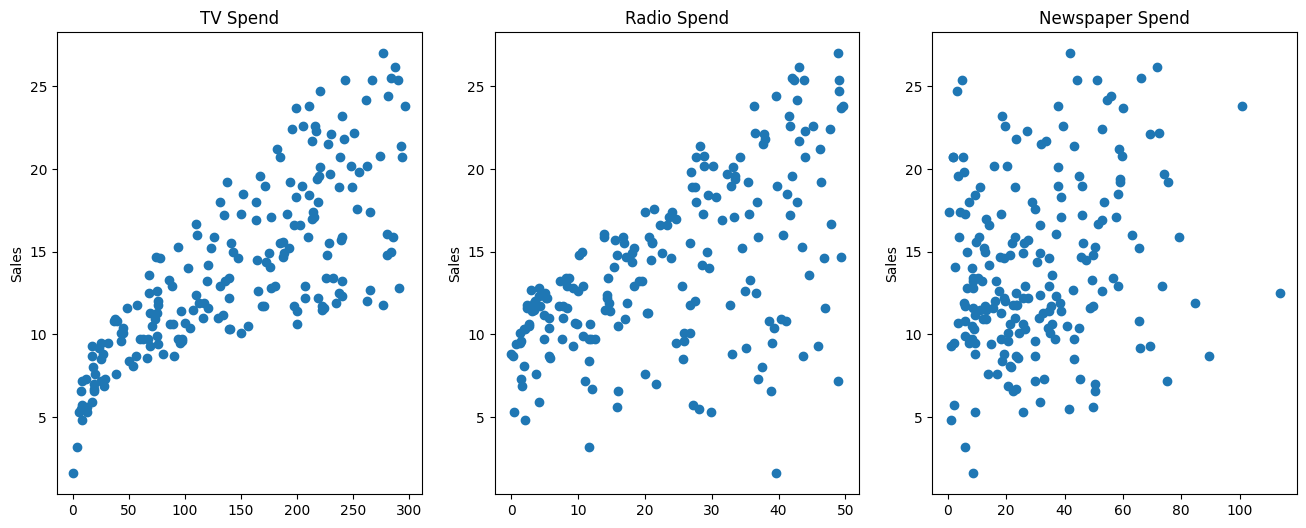

In [10]:
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (16,6))

axes[0].plot(df['TV'], df['sales'], 'o')
axes[0].set_ylabel("Sales")
axes[0].set_title("TV Spend")

axes[1].plot(df['radio'], df['sales'], 'o')
axes[1].set_ylabel("Sales")
axes[1].set_title("Radio Spend")

axes[2].plot(df['newspaper'], df['sales'], 'o')
axes[2].set_ylabel("Sales")
axes[2].set_title("Newspaper Spend")

# Statistical Approach using **statsmodels**

In [11]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

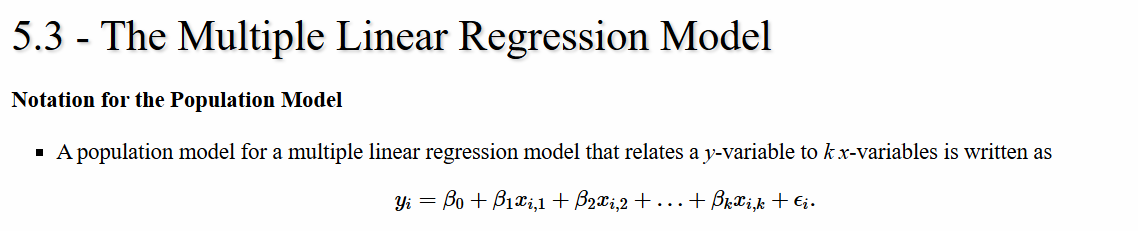

In [12]:
est = smf.ols(formula = 'sales ~ TV + radio + newspaper', data = df).fit()
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Sat, 04 Jan 2025   Prob (F-statistic):           1.58e-96
Time:                        14:48:26   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
radio          0.1885      0.009     21.893      0.000       0.172       0.206
newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The Adjusted R-squared (Co-efficient of Determination/Goodness of Fit)=	0.896 i.e. 89.6% implies that 89.6% of the total variation in Sales is explained by the model i.e. the selected features.

The goodness of fit test's probability value also shows that the model is a good fit.

We have also found that Investment on TV (p-value= 0.000) and Radio (p-value= 0.000) Advertisement has Statistically Significant Impact on Sales at 5% level of significance.

# Machine Learning Approach using **scikit-learn**

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X = df.drop('sales', axis=1)
y = df['sales']

In [15]:
X.head()

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [16]:
y.head()

,sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state= 101)

In [18]:
X_train.shape

(140, 3)

In [19]:
X_train.head()

,TV,radio,newspaper
85,193.2,18.4,65.7
183,287.6,43.0,71.8
127,80.2,0.0,9.2
53,182.6,46.2,58.7
100,222.4,4.3,49.8


In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
model = LinearRegression()

In [22]:
model.fit(X_train, y_train)

LinearRegression()

In [23]:
y_test.head()

,sales
37,14.7
109,19.8
31,11.9
89,16.7
66,9.5


In [25]:
y_hat = model.predict(X_test)
y_hat

array([15.74131332, 19.61062568, 11.44888935, 17.00819787,  9.17285676,
        7.01248287, 20.28992463, 17.29953992,  9.77584467, 19.22194224,
       12.40503154, 13.89234998, 13.72541098, 21.28794031, 18.42456638,
        9.98198406, 15.55228966,  7.68913693,  7.55614992, 20.40311209,
        7.79215204, 18.24214098, 24.68631904, 22.82199068,  7.97962085,
       12.65207264, 21.46925937,  8.05228573, 12.42315981, 12.50719678,
       10.77757812, 19.24460093, 10.070269  ,  6.70779999, 17.31492147,
        7.76764327,  9.25393336,  8.27834697, 10.58105585, 10.63591128,
       13.01002595,  9.77192057, 10.21469861,  8.04572042, 11.5671075 ,
       10.08368001,  8.99806574, 16.25388914, 13.23942315, 20.81493419,
       12.49727439, 13.96615898, 17.56285075, 11.14537013, 12.56261468,
        5.50870279, 23.29465134, 12.62409688, 18.77399978, 15.18785675])

In [26]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [27]:
MAE = mean_absolute_error(y_test, y_hat)
MSE = mean_squared_error(y_test, y_hat)
RMSE = np.sqrt(MSE)

print(MAE)
print(MSE)
print(RMSE)

1.213745773614481
2.2987166978863796
1.5161519375993884


## Diagnostic Check of the Model

In [28]:
# Calculating the residuals/errors
test_res = y_test - y_hat
test_res

,sales
37,-1.041313
109,0.189374
31,0.451111
89,-0.308198
66,0.327143
119,-0.412483
54,-0.089925
74,-0.299540
145,0.524155
142,0.878058


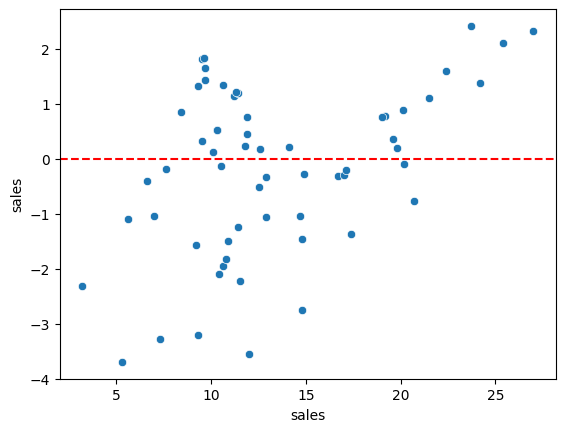

In [29]:
sns.scatterplot(x=y_test, y= test_res)
plt.axhline(y=0, color='r', ls='--')

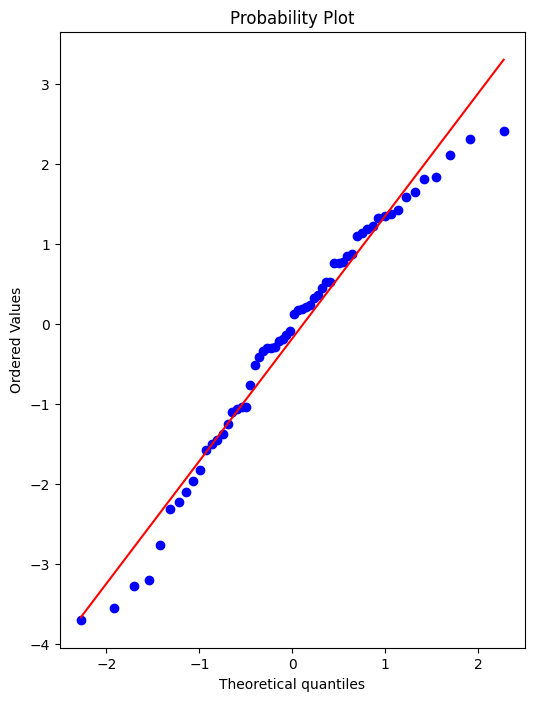

In [30]:
import scipy as sp

# Create a figure and axis to plot on
fig, ax = plt.subplots(figsize=(6,8),dpi=100)
# probplot returns the raw values if needed
# we just want to see the plot, so we assign these values to _
_ = sp.stats.probplot(test_res,plot=ax)

## Model Training on Full Data

In [32]:
final_model = LinearRegression()
final_model.fit(X,y)

LinearRegression()

In [33]:
y_hat = final_model.predict(X)

In [34]:
residuals = y_hat - y

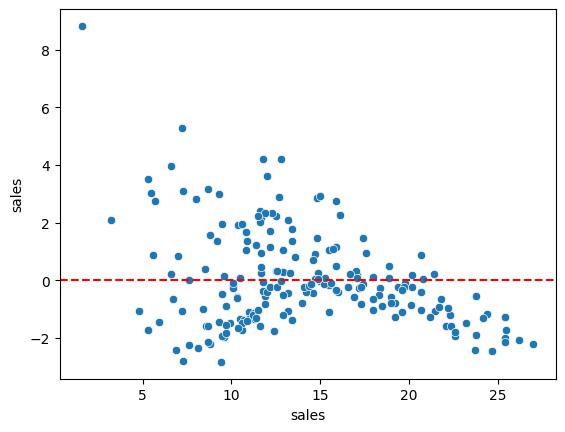

In [35]:
sns.scatterplot(x=y,y=residuals)
plt.axhline(y=0, color='r', linestyle='--')

In [36]:
final_model.coef_

array([ 0.04576465,  0.18853002, -0.00103749])

## Interpreting the coefficients:

* Holding all other features fixed, a 1 unit (1 USD) increase in TV Spend is associated with an average increase in sales of 0.045 units .

* This basically means that for every $1000 dollars spend on TV Ads, we could expect 45 more units sold.